**Trabalho de Inteligência Artificial**

Importando bibliotecas

In [5]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics 
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import plotly.graph_objects as go
import plotly.express as px 

Questão 1

In [ ]:
data = pd.read_csv("ex1data1.txt")

In [ ]:
data.shape

(96, 2)

In [ ]:
data.columns = ["Dado", "Resultado"]

X = data["Dado"]
Y = data["Resultado"]

Plotando o gráfico podemos observar que os dados formam uma reta, desse modo, uma regressão linear é aplicável como forma de prever o resultado para uma determinada entrada



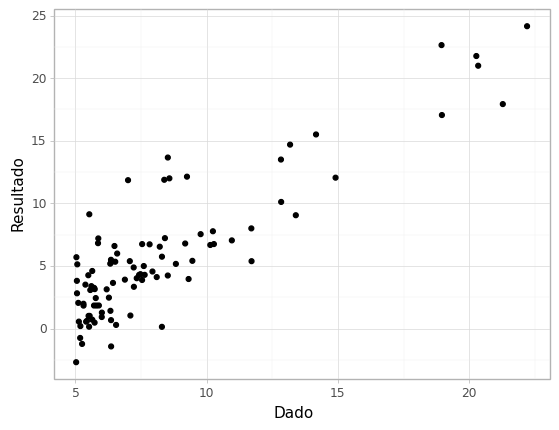

<ggplot: (8730179694257)>

In [ ]:
(ggplot(data,aes(X,Y))
 + geom_point()
 + theme_light()
)

In [ ]:
# implementa regressão linear com gradiente descendente estocástico 

class linear_regr(object):

    def __init__(self, learning_rate=0.001, batch_size=6, training_iters=1000):
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.batch_size = batch_size
        self.EQM = list()
        

    def fit(self, X_train, y_train, plot=False):

        # formata os dados         
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
            X = np.insert(X, 0, 1, 1)

            # inicia os parâmetros com pequenos valores aleatórios         
            # (chute razoável)         
            self.w_hat = np.random.normal(0,5, size = X[0].shape)

        for i in range(self.training_iters):

            # cria os mini-lotes             
            offset = (i * self.batch_size) % (y_train.shape[0] - self.batch_size)
            batch_X = X[offset:(offset + self.batch_size), :]
            batch_y = y_train[offset:(offset + self.batch_size)]

            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente 
            
            # atualiza o gradiente com informação dos pontos do lote           
            for point, yi in zip(batch_X, batch_y):    
                gradient +=  (point * self.w_hat - yi) * point
       
                
            gradient *= self.learning_rate
            self.w_hat -= gradient

            erro_quadratico = (np.array(y_train)-np.dot(X, self.w_hat))**2

            self.EQM.append(sum(erro_quadratico)/len(X_train))

    def predictResult(self, X_test):
        # formata os dados         
        if len(X_test.values.shape) < 2:
          X = X_test.values.reshape(-1,1)
          X = np.insert(X, 0, 1, 1)

          return np.dot(X, self.w_hat) 


In [ ]:
regr = linear_regr()
regr.fit(X, Y)

Pesos encontrados

In [ ]:
regr.w_hat

array([5.63544546, 0.66741245])

In [ ]:
# Convertendo lista em DataFrame para plotar no PlotNine
EQM_df = pd.DataFrame(regr.EQM)
EQM_df

,0
0,2789.355953
1,1328.192090
2,1000.515093
3,431.075640
4,109.191841
...,...
995,74.607072
996,55.487959
997,48.356626
998,43.650199


Plotando o gráfico do erro quadrático médio percebemos que o erro diminui conforme o número de épocas (iterações) aumenta. Devido aos batchs (partes aletórias) percebemos que mesmo com o avanço das épocas, o EQM ainda vária bastante, isso se dá por conta da learning_rate (diminuindo o valor, EQM é mais constante)

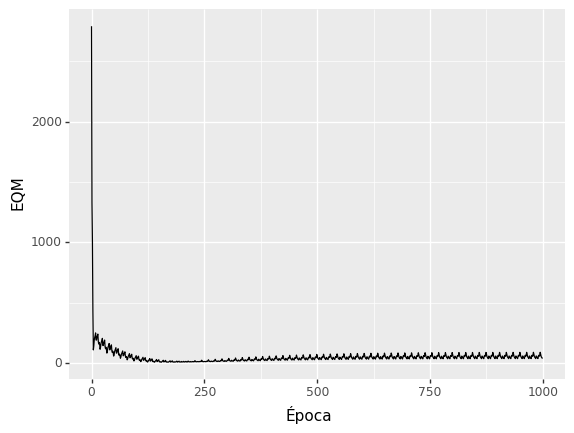

<ggplot: (8730179419409)>

In [ ]:
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

Podemos perceber que o modelo converge (Diminuindo o learning_rate o modelo pode melhorar) 

* Melhor learning_rate: 0.00001

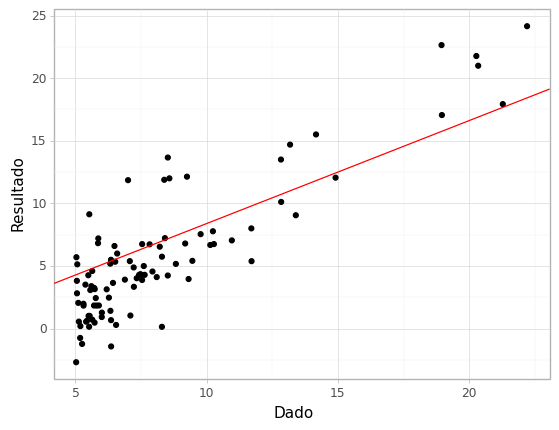

<ggplot: (8730179484821)>

In [ ]:
(ggplot(data,aes('Dado','Resultado'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=regr.w_hat[0] , slope=regr.w_hat[1], color='red')
)

Questão 2

Tratamento dos dados

In [300]:
data = pd.read_csv("ex1data2.txt")

In [301]:
data.shape

(46, 3)

In [302]:
Y = data.iloc[:, -1].values.reshape(data.shape[0], 1)
X = data.iloc[:, :-1]

In [303]:
X.shape

(46, 2)

In [304]:
Y.shape

(46, 1)

In [305]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X.shape

(46, 3)

In [ ]:
def predict(X, theta):
    return np.dot(X, theta)

In [ ]:
# implementa regressão linear multipla
def RegressaoMultipla(X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  erro_list = []
  for i in range(iteration):
      y_pred = np.dot(X, theta)

      d_theta = (1/m)*np.dot(X.T, y_pred - Y)
      theta = theta - learning_rate*d_theta

      erro_quadratico = (Y-y_pred) ** 2

      erro_list.append(sum(erro_quadratico)/len(X))

  return erro_list, theta

In [ ]:
EQM, theta = RegressaoMultipla(X, Y, 0.01, 100)

Pesos encontrados pela Regressão

In [ ]:
theta

array([[0.20852325],
       [0.71103323],
       [0.55488162]])

In [ ]:
# Convertendo lista em DataFrame para plotar no PlotNine
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,13.055838
1,9.469951
2,6.933757
3,5.139786
4,3.870630
...,...
95,0.651182
96,0.649866
97,0.648557
98,0.647257


Plotando o gráfico do erro quadrático médio percebemos que o erro diminui conforme o número de épocas (iterações) aumenta. Depois de algumas iterações, ele permanece constante (o algoritmo terminou de "evoluir/aprender"). Nesse gráfico a curva de aprendizado é muito mais evidente


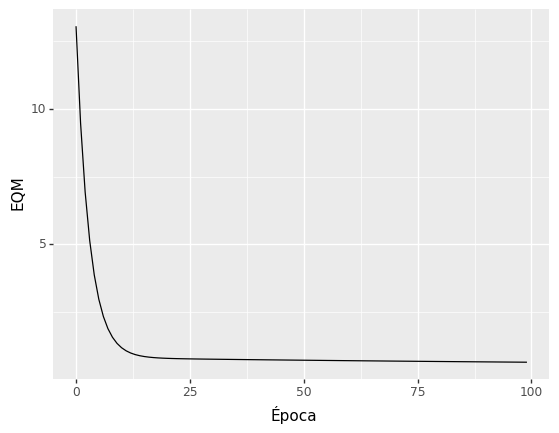

<ggplot: (8730179517073)>

In [ ]:
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

Resultado dos coeficientes através do método dos mínimos quadrados

In [306]:
mhat, residuals, rank, s = np.linalg.lstsq(X,Y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


array([[ 0.8780775 ],
       [ 1.38755878],
       [-0.08186383]])

Pesos encontrados pela método 
dos mínimos quadrados

In [307]:
mhat

array([[ 0.8780775 ],
       [ 1.38755878],
       [-0.08186383]])

Os coeficientes dos métodos são diferentes, mas ajustando a learning_rate ou aumentando o número de épocas, os 2 métodos vão convergir

Questão 3

In [1]:
with open('ex1data3.txt', 'r') as file :
  filedata = file.read()

In [2]:
filedata = filedata.replace(' ', ',')

In [3]:
with open('ex1data3.txt', 'w') as file:
  file.write(filedata)

In [107]:
data = pd.read_csv("ex1data3.txt", header=None)

In [108]:
data.head()

,0,1,2,3,4,5,6
0,NaN,2.104,3,1.214590,1.645454,2.040360,3.999
1,NaN,1.600,3,0.804845,1.156956,1.043933,3.299
2,NaN,2.400,3,1.526176,1.990969,2.735965,3.690
3,NaN,1.416,2,1.017324,1.048135,0.873698,2.320
4,NaN,3.000,4,1.352385,2.118710,2.403007,5.399


In [109]:
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [110]:
data.shape

(47, 6)

In [111]:
X_train = data.iloc[0:30, :-1]
Y_train = data.iloc[0:30:, -1].values.reshape(X_train.shape[0], 1)

In [112]:
X_train.shape

(30, 5)

In [113]:
Y_train.shape

(30, 1)

In [114]:
X_test = data.iloc[30:, :-1]
Y_test = data.iloc[30:, -1].values.reshape(X_test.shape[0], 1)

In [115]:
X_test.shape

(17, 5)

In [116]:
Y_test.shape

(17, 1)

In [252]:
EQM = []

Para λ = 0 - Conjunto de treino

In [253]:
X_train_0 = np.vstack((np.zeros((X_train.shape[0], )), X_train.T)).T
X_train_0.shape

(30, 6)

In [254]:
mhat_0, residuals, rank, s = np.linalg.lstsq(X_train_0, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Coeficientes para λ = 0 

In [255]:
mhat_0

array([[ 0.        ],
       [ 1.71969464],
       [ 0.29941769],
       [-0.19665058],
       [ 0.05788413],
       [-0.49309599]])

In [256]:
Y_pred_test = np.dot(X_train_0, mhat_0)

In [257]:
erro_quadratico_0 = (Y_train-Y_pred_test) ** 2

In [259]:
erro_quadratico_medio_0 = sum(erro_quadratico_0)/len(X_train_0)

Erro quadrático médio para λ = 0

In [260]:
erro_quadratico_medio_0[0]

0.44109318275340625

In [261]:
EQM.append(erro_quadratico_medio_0[0])

Para λ=1 - Conjunto de treino

In [262]:
X_train_1 = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_train_1.shape

(30, 6)

In [263]:
mhat_1, residuals, rank, s = np.linalg.lstsq(X_train_1, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [264]:
mhat_1

array([[ 0.79298919],
       [ 2.05650083],
       [ 0.12143939],
       [-1.16137913],
       [ 0.06272863],
       [-0.39110215]])

In [265]:
Y_pred_test = np.dot(X_train_1, mhat_1)

In [266]:
erro_quadratico_1 = (Y_train-Y_pred_test) ** 2

In [267]:
erro_quadratico_medio_1 = sum(erro_quadratico_1)/len(X_train_1)

In [268]:
EQM.append(erro_quadratico_medio_1[0])

Para λ=2 - Conjunto de treino

In [269]:
X_train_2 = np.vstack((np.full((X_train.shape[0], ), 2), X_train.T)).T
X_train_2.shape

(30, 6)

In [270]:
mhat_2, residuals, rank, s = np.linalg.lstsq(X_train_2, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [271]:
mhat_2

array([[ 0.39649459],
       [ 2.05650083],
       [ 0.12143939],
       [-1.16137913],
       [ 0.06272863],
       [-0.39110215]])

In [272]:
Y_pred_test = np.dot(X_train_2, mhat_2)

In [273]:
erro_quadratico_2 = (Y_train-Y_pred_test) ** 2

In [274]:
erro_quadratico_medio_2 = sum(erro_quadratico_2)/len(X_train_2)

In [275]:
EQM.append(erro_quadratico_medio_2[0])

Para λ=3 - Conjunto de treino

In [276]:
X_train_3 = np.vstack((np.full((X_train.shape[0], ), 3), X_train.T)).T
X_train_3.shape

(30, 6)

In [277]:
mhat_3, residuals, rank, s = np.linalg.lstsq(X_train_3, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [278]:
mhat_3

array([[ 0.26432973],
       [ 2.05650083],
       [ 0.12143939],
       [-1.16137913],
       [ 0.06272863],
       [-0.39110215]])

In [279]:
Y_pred_test = np.dot(X_train_3, mhat_3)

In [280]:
erro_quadratico_3 = (Y_train-Y_pred_test) ** 2

In [281]:
erro_quadratico_medio_3 = sum(erro_quadratico_3)/len(X_train_3)

In [282]:
EQM.append(erro_quadratico_medio_3[0])

Para λ=4 - Conjunto de treino

In [283]:
X_train_4 = np.vstack((np.full((X_train.shape[0], ), 4), X_train.T)).T
X_train_4.shape

(30, 6)

In [284]:
mhat_4, residuals, rank, s = np.linalg.lstsq(X_train_4, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [285]:
mhat_4

array([[ 0.1982473 ],
       [ 2.05650083],
       [ 0.12143939],
       [-1.16137913],
       [ 0.06272863],
       [-0.39110215]])

In [286]:
Y_pred_test = np.dot(X_train_4, mhat_4)

In [287]:
erro_quadratico_4 = (Y_train-Y_pred_test) ** 2

In [288]:
erro_quadratico_medio_4 = sum(erro_quadratico_4)/len(X_train_4)

In [289]:
EQM.append(erro_quadratico_medio_4[0])

Para λ=5 - Conjunto de treino

In [290]:
X_train_5 = np.vstack((np.full((X_train.shape[0], ), 5), X_train.T)).T
X_train_5.shape

(30, 6)

In [291]:
mhat_5, residuals, rank, s = np.linalg.lstsq(X_train_4, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [292]:
mhat_5

array([[ 0.1982473 ],
       [ 2.05650083],
       [ 0.12143939],
       [-1.16137913],
       [ 0.06272863],
       [-0.39110215]])

In [293]:
Y_pred_test = np.dot(X_train_5, mhat_5)

In [294]:
erro_quadratico_5 = (Y_train-Y_pred_test) ** 2

In [295]:
erro_quadratico_medio_5 = sum(erro_quadratico_5)/len(X_train_5)

In [296]:
EQM.append(erro_quadratico_medio_5[0])

Gráfico de EQC X λ (CONJUNTO DE TREINO)

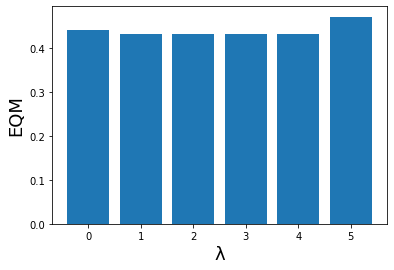

In [299]:
plt.bar(np.arange(6),EQM)
plt.ylabel('EQM', fontsize=18)
plt.xlabel('λ', fontsize=18)
plt.show()

In [412]:
EQM = []

Para λ = 0

In [413]:
X_test_0 = np.vstack((np.zeros((X_test.shape[0], )), X_test.T)).T
X_test_0.shape

(17, 6)

In [414]:
mhat_t_0, residuals, rank, s = np.linalg.lstsq(X_test_0, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [415]:
mhat_t_0

array([[ 0.        ],
       [ 0.30703476],
       [ 0.00827681],
       [ 1.91958786],
       [-0.1322147 ],
       [ 0.47658319]])

In [416]:
Y_pred_test = np.dot(X_test_0, mhat_t_0)

In [417]:
erro_quadratico_t_0 = (Y_test-Y_pred_test) ** 2

In [418]:
erro_quadratico_medio_t_0 = sum(erro_quadratico_t_0)/len(X_test_0)

In [419]:
EQM.append(erro_quadratico_medio_t_0[0])

Para λ = 1

In [420]:
X_test_1 = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T
X_test_1.shape

(17, 6)

In [421]:
mhat_t_1, residuals, rank, s = np.linalg.lstsq(X_test_1, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [422]:
mhat_t_1

array([[ 1.60593863],
       [ 1.41461821],
       [-0.23448528],
       [-0.15820172],
       [-0.25151207],
       [ 0.0996189 ]])

In [423]:
Y_pred_test = np.dot(X_test_1, mhat_t_1)

In [424]:
erro_quadratico_t_1 = (Y_test-Y_pred_test) ** 2

In [425]:
erro_quadratico_medio_t_1 = sum(erro_quadratico_t_1)/len(X_test_1)

In [426]:
EQM.append(erro_quadratico_medio_t_1[0])

Para λ = 2

In [427]:
X_test_2 = np.vstack((np.full((X_test.shape[0], ), 2), X_test.T)).T
X_test_2.shape

(17, 6)

In [428]:
mhat_t_2, residuals, rank, s = np.linalg.lstsq(X_test_2, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [429]:
mhat_t_2

array([[ 0.80296931],
       [ 1.41461821],
       [-0.23448528],
       [-0.15820172],
       [-0.25151207],
       [ 0.0996189 ]])

In [430]:
Y_pred_test = np.dot(X_test_2, mhat_t_2)

In [431]:
erro_quadratico_t_2 = (Y_test-Y_pred_test) ** 2

In [432]:
erro_quadratico_medio_t_2 = sum(erro_quadratico_t_2)/len(X_test_2)

In [433]:
EQM.append(erro_quadratico_medio_t_2[0])

Para λ = 3

In [434]:
X_test_3 = np.vstack((np.full((X_test.shape[0], ), 3), X_test.T)).T
X_test_3.shape

(17, 6)

In [435]:
mhat_t_3, residuals, rank, s = np.linalg.lstsq(X_test_3, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [436]:
mhat_t_3

array([[ 0.53531288],
       [ 1.41461821],
       [-0.23448528],
       [-0.15820172],
       [-0.25151207],
       [ 0.0996189 ]])

In [437]:
Y_pred_test = np.dot(X_test_3, mhat_t_3)

In [438]:
erro_quadratico_t_3 = (Y_test-Y_pred_test) ** 2

In [439]:
erro_quadratico_medio_t_3 = sum(erro_quadratico_t_3)/len(X_test_3)

In [440]:
EQM.append(erro_quadratico_medio_t_3[0])

Para λ = 4

In [441]:
X_test_4 = np.vstack((np.full((X_test.shape[0], ), 4), X_test.T)).T
X_test_4.shape

(17, 6)

In [442]:
mhat_t_4, residuals, rank, s = np.linalg.lstsq(X_test_4, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [443]:
mhat_t_4

array([[ 0.40148466],
       [ 1.41461821],
       [-0.23448528],
       [-0.15820172],
       [-0.25151207],
       [ 0.0996189 ]])

In [444]:
Y_pred_test = np.dot(X_test_4, mhat_t_4)

In [445]:
erro_quadratico_t_4 = (Y_test-Y_pred_test) ** 2

In [446]:
erro_quadratico_medio_t_4 = sum(erro_quadratico_t_4)/len(X_test_4)

In [447]:
EQM.append(erro_quadratico_medio_t_4[0])

Para λ = 5

In [448]:
X_test_5 = np.vstack((np.full((X_test.shape[0], ), 5), X_test.T)).T
X_test_5.shape

(17, 6)

In [449]:
mhat_t_5, residuals, rank, s = np.linalg.lstsq(X_test_5, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [450]:
mhat_t_5

array([[ 0.32118773],
       [ 1.41461821],
       [-0.23448528],
       [-0.15820172],
       [-0.25151207],
       [ 0.0996189 ]])

In [451]:
Y_pred_test = np.dot(X_test_5, mhat_t_5)

In [452]:
erro_quadratico_t_5 = (Y_test-Y_pred_test) ** 2

In [453]:
erro_quadratico_medio_t_5 = sum(erro_quadratico_t_5)/len(X_test_5)

In [454]:
EQM.append(erro_quadratico_medio_t_5[0])

Gráfico de EQC X λ (CONJUNTO DE TESTE)

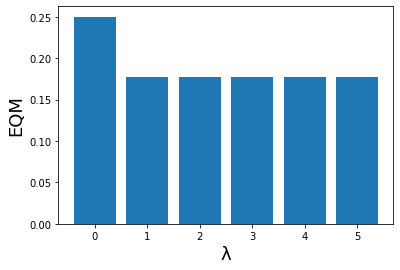

In [456]:
plt.bar(np.arange(6),EQM)
plt.ylabel('EQM', fontsize=18)
plt.xlabel('λ', fontsize=18)
plt.show()